In [33]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import generatevector
from preprocess.parse import getRootSuffix
from argparse import Namespace
from tqdm import tqdm
import time
import CrossValidation
import warnings
import seaborn as sns
import matplotlib.patches as patches

In [3]:
args = Namespace(
        stop = False, 
        stem = False, 
        mime = False, 
        digit = False, 
        other = False
    )
vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)

In [4]:
vectors.shape

(7494, 86035)

In [5]:
array = vectors.todense()

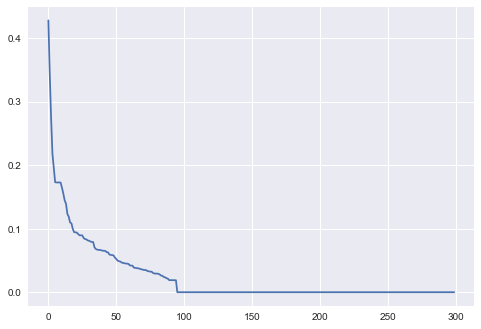

In [26]:
a=sorted(np.array(array[100]).reshape(-1,), key=None, reverse=True)
plt.plot(a[:300])

In [27]:
np.count_nonzero(a)

95

In [20]:
#count non-zero elements
nonzero=[]
for vector in array:
#     print(np.count_nonzero(sorted(np.array(vector).reshape(-1,), key=None, reverse=True)))
    nonzero.append(np.count_nonzero(sorted(np.array(vector).reshape(-1,), key=None, reverse=True)))

D:\software\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


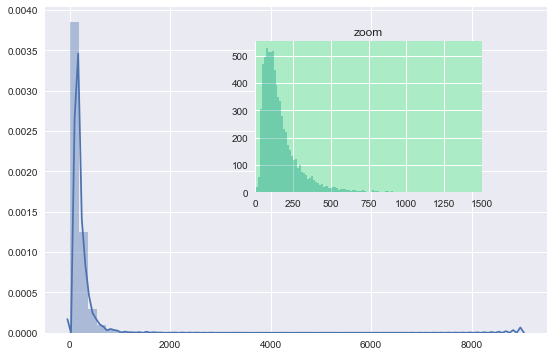

In [41]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(nonzero, ax=ax, kde=True)
# ax.set_title('Histogram of non-zero elements')
# Create a Rectangle patch
rect = patches.Rectangle((0.5,0.5),0.5,0.5,linewidth=5,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

ax2 = plt.axes([0.45, 0.45, .35, .35], facecolor='#ABEBC6')
sns.set_color_codes()
sns.distplot(nonzero, ax=ax2, kde=False ,color='#16A085', bins='auto')
ax2.set_title('zoom')
ax2.set_xlim([0,1500])
fig.savefig("nonzero.pdf", bbox_inches='tight')